In [ ]:
! pip install niapy

In [21]:
import numpy as np
from niapy.algorithms import Algorithm
from niapy.util.random import levy_flight
from niapy.task import Task
import matplotlib.pyplot as plt

graph = []

class SquirrelSearchAlgorithm(Algorithm):
    Name = ['SquirrelSearchAlgorithm', 'SSA']


    def __init__(self, population_size=50, food_sources=4, prob_predation=0.1, gliding_constant=1.9, scale=18, *args, **kwargs):
        super().__init__(population_size, *args, **kwargs)
        self.food_sources = food_sources
        self.prob_predation = prob_predation
        self.gliding_constant = gliding_constant
        self.scale = scale

    def set_parameters(self, population_size=50, food_sources=4, prob_predation=0.1, gliding_constant=1.9, scale=18, *args, **kwargs):
        super().set_parameters(population_size, *args, **kwargs)
        self.food_sources = food_sources
        self.prob_predation = prob_predation
        self.gliding_constant = gliding_constant
        self.scale = scale

    def get_parameters(self):
        params = super().get_parameters()
        params.update({
            'food_sources': self.food_sources,
            'prob_predation': self.prob_predation,
            'gliding_constant': self.gliding_constant,
            'scale': self.scale,
        })
        return params

    def gliding_distance(self):
        lift = 0.9783723933835806 / self.uniform(0.675, 1.5)
        drag = 1.630620655639301
        return 8.0 / (self.scale * drag / lift)

    def run_iteration(self, task, population, population_fitness, best_x, best_fitness, **params):
        indices = np.argsort(population_fitness)
        ht = indices[0]
        at = indices[1:self.food_sources]
        nt = indices[self.food_sources:]


        new_population = population.copy()

        for index in at:
            if self.random() >= self.prob_predation:
                new_population[index] += self.gliding_distance() * self.gliding_constant * (population[ht] - population[index])
                new_population[index] = task.repair(new_population[index], rng=self.rng)
            else:
                new_population[index] = self.uniform(task.lower, task.upper)

        nt = self.rng.permutation(nt)
        nt_1 = nt[:len(nt) // 2]
        nt_2 = nt[len(nt) // 2:]

        for index in nt_1:
            if self.random() >= self.prob_predation:
                a = self.rng.choice(at)
                new_population[index] += self.gliding_distance() * self.gliding_constant * (population[a] - population[index])
                new_population[index] = task.repair(new_population[index], rng=self.rng)
            else:
                new_population[index] = self.uniform(task.lower, task.upper)

        for index in nt_2:
            if self.random() >= self.prob_predation:
                new_population[index] += self.gliding_distance() * self.gliding_constant * (population[ht] - population[index])
                new_population[index] = task.repair(new_population[index], rng=self.rng)
            else:
                new_population[index] = self.uniform(task.lower, task.upper)

        s_min = 1e-5 / (365 ** ((task.iters + 1) / (task.max_iters / 2.5)))
        sc = np.sqrt(np.sum((new_population[at] - new_population[ht]) ** 2))

        if sc < s_min:
            new_population[nt_1] = task.lower + levy_flight(size=(len(nt_1), task.dimension), rng=self.rng) * task.range
            new_population[nt_1] = task.repair(new_population[nt_1], rng=self.rng)

        new_fitness = np.apply_along_axis(task.eval, 1, new_population)
        best_x, best_fitness = self.get_best(new_population, new_fitness, best_x, best_fitness)

        graph.append(best_fitness)

        return new_population, new_fitness, best_x, best_fitness, {}



Best: 9.108492240314161


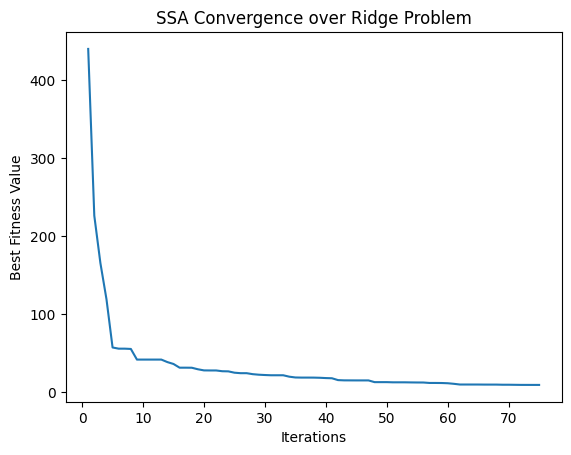

In [ ]:
if __name__ == '__main__':
    fit = []
    for i in range(1):
        task = Task('Ridge', dimension=30, lower=-10, upper=10, max_iters=75)
        algo = SquirrelSearchAlgorithm()
        _, best_fitness = algo.run(task)
        fit.append(best_fitness)

    print(f'Best: {np.min(fit)}')

    y = [i for i in range(1, 76)]
    plt.plot(y, graph)
    plt.xlabel("Iterations")
    plt.ylabel("Best Fitness Value")
    plt.title("SSA Convergence over Ridge Problem")
    plt.show()

Best: 1.3882782069397508


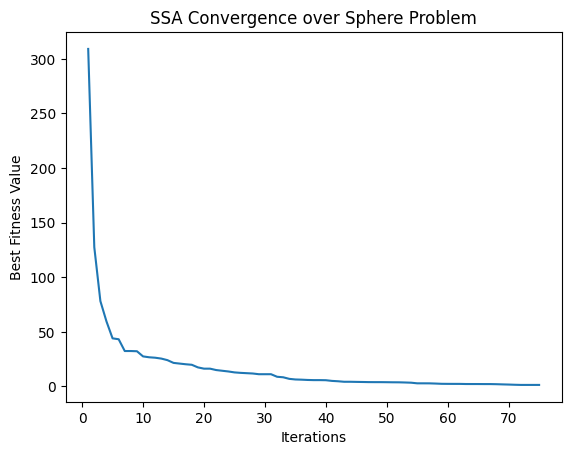

In [3]:
if __name__ == '__main__':
    fit = []
    for i in range(1):
        task = Task('Sphere', dimension=30, lower=-10, upper=10, max_iters=75)
        algo = SquirrelSearchAlgorithm()
        _, best_fitness = algo.run(task)
        fit.append(best_fitness)

    print(f'Best: {np.min(fit)}')

    y = [i for i in range(1, 76)]
    plt.plot(y, graph)
    plt.xlabel("Iterations")
    plt.ylabel("Best Fitness Value")
    plt.title("SSA Convergence over Sphere Problem")
    plt.show()

Best: 160.5816610758473


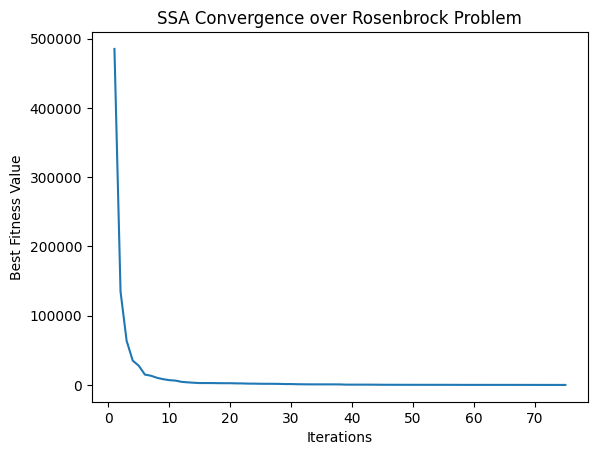

In [5]:
if __name__ == '__main__':
    fit = []
    for i in range(1):
        task = Task('Rosenbrock', dimension=30, lower=-10, upper=10, max_iters=75)
        algo = SquirrelSearchAlgorithm()
        _, best_fitness = algo.run(task)
        fit.append(best_fitness)

    print(f'Best: {np.min(fit)}')

    y = [i for i in range(1, 76)]
    plt.plot(y, graph)
    plt.xlabel("Iterations")
    plt.ylabel("Best Fitness Value")
    plt.title("SSA Convergence over Rosenbrock Problem")
    plt.show()

Best: 33.579679660206935


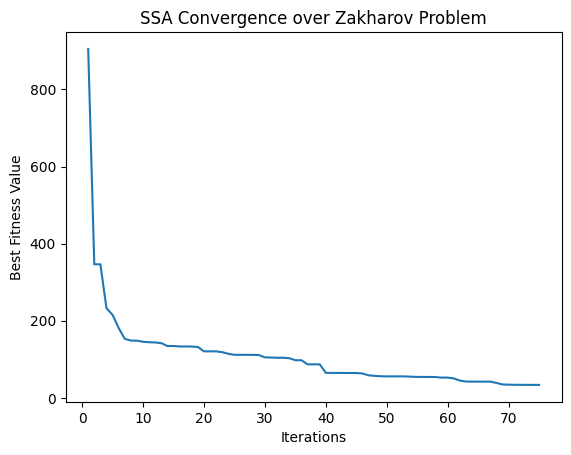

In [22]:
if __name__ == '__main__':
    fit = []
    for i in range(1):
        task = Task('Zakharov', dimension=30, lower=-10, upper=10, max_iters=75)
        algo = SquirrelSearchAlgorithm()
        _, best_fitness = algo.run(task)
        fit.append(best_fitness)

    print(f'Best: {np.min(fit)}')

    y = [i for i in range(1, 76)]
    plt.plot(y, graph)
    plt.xlabel("Iterations")
    plt.ylabel("Best Fitness Value")
    plt.title("SSA Convergence over Zakharov Problem")
    plt.show()